In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
train=pd.read_csv(r'D:/ML/纽约出租车车费预测/train.csv',nrows=1000000)
test=pd.read_csv(r'D:/ML/纽约出租车车费预测/test.csv')

### 第二步：数据分析、清洗

In [3]:
train.shape

(1000000, 8)

In [4]:
test.shape

(9914, 7)

In [5]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
train.describe()
# 经纬度有范围，所以数据有问题

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


### 1.检查是否有空值

In [7]:
train.isnull().sum()
#  处理方法：删除掉空的行

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [8]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
train.drop(train[train.isnull().any(1)].index,axis=0,inplace=True)
# 找到空值那一行的索引，然后删除

In [10]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### 2.检查车费fare_amount这列数据

In [11]:
train['fare_amount'].describe()
#发现有票价为负的情况，需要处理

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [12]:
from collections import Counter
Counter(train['fare_amount']<0)
# 处理方式：把票价小于0的行进行删除

Counter({False: 999952, True: 38})

In [13]:
train.drop(train[train['fare_amount']<0].index,axis=0,inplace=True)

In [14]:
Counter(train['fare_amount']<0)

Counter({False: 999952})

Text(0.5, 1.0, 'histoqran')

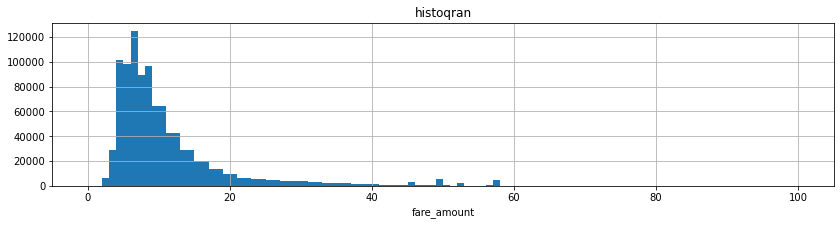

In [15]:
# 将票价位于0-100之间的数据，用直方图（hist）进行可视化
train['fare_amount'].hist(bins=100,range=(0,100),figsize=(14,3))
#https://blog.csdn.net/weixin_45520028/article/details/113924866 hist()函数参数设置
plt.xlabel('fare_amount')
plt.title('histoqran')

### 3.检查乘客passenger_count这一列

In [16]:
train.passenger_count.describe()
# d等价于 train['passenger_count'].describe()
# 乘客数不能大于6

count    999952.000000
mean          1.684942
std           1.323908
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [17]:
Counter(train['passenger_count']>6)

Counter({False: 999951, True: 1})

In [18]:
train.drop(train[train['passenger_count']>6].index,axis=0,inplace=True)

In [19]:
Counter(train['passenger_count']>6)

Counter({False: 999951})

### 4.检查上车点的经纬度
纬度（-90--90）   

经度（-180--180）

In [20]:
train.pickup_latitude.describe() #查看纬度

count    999951.000000
mean         39.929090
std           7.626025
min       -3116.285383
25%          40.734965
50%          40.752695
75%          40.767154
max        2621.628430
Name: pickup_latitude, dtype: float64

In [21]:
Counter(train['pickup_latitude']<-90)

Counter({False: 999948, True: 3})

In [22]:
train.drop(train[train['pickup_latitude']<-90].index,axis=0,inplace=True)

In [23]:
Counter(train['pickup_latitude']<-90)

Counter({False: 999948})

In [24]:
Counter(train['pickup_latitude']>90)

Counter({False: 999939, True: 9})

In [25]:
train.drop(train[train['pickup_latitude']>90].index,axis=0,inplace=True)

In [26]:
Counter(train['pickup_latitude']>90)

Counter({False: 999939})

In [27]:
train.pickup_longitude.describe()

count    999939.000000
mean        -72.525443
std          10.692752
min       -1452.988333
25%         -73.992060
50%         -73.981792
75%         -73.967095
max          40.850357
Name: pickup_longitude, dtype: float64

In [28]:
Counter(train['pickup_longitude']<-180)

Counter({False: 999928, True: 11})

In [29]:
train.drop(train[train['pickup_longitude']<-180].index,axis=0,inplace=True)

In [30]:
Counter(train['pickup_longitude']<-180)

Counter({False: 999928})

### 5.检查下车点的经纬度
纬度（-90--90）   

经度（-180--180）

In [31]:
train.dropoff_latitude.describe() #纬度

count    999928.000000
mean         39.926691
std           7.104385
min       -3114.338567
25%          40.734047
50%          40.753166
75%          40.768129
max        1651.553433
Name: dropoff_latitude, dtype: float64

In [32]:
train.dropoff_longitude.describe()#经度

count    999928.000000
mean        -72.521750
std          10.626273
min       -1329.621332
25%         -73.991385
50%         -73.980135
75%         -73.963654
max          45.581619
Name: dropoff_longitude, dtype: float64

In [33]:
train.drop(train[(train['dropoff_latitude']<-90) | (train['dropoff_latitude']>90)].index,axis=0,inplace=True)
# 框架train.drop(train[()|()].index,axis=,inplace)

In [34]:
train.drop(train[(train['dropoff_longitude']<-180)|(train['dropoff_longitude']>180)].index,axis=0,inplace=True)

In [35]:
train.dropoff_latitude.describe()

count    999911.000000
mean         39.926038
std           6.093210
min         -74.035197
25%          40.734047
50%          40.753166
75%          40.768129
max          81.510177
Name: dropoff_latitude, dtype: float64

In [36]:
train.dropoff_longitude.describe()

count    999911.000000
mean        -72.515537
std          10.396301
min        -121.391248
25%         -73.991385
50%         -73.980135
75%         -73.963654
max          45.581619
Name: dropoff_longitude, dtype: float64

### 6.可视化地图，清理离异值
训练集的数据要对标测试集

In [37]:
# 在test数据集上确定一个区域框，删除掉train数据集中不在区域框内的奇异点
#获取纬度的取值范围

min(test.pickup_latitude.min(),test.dropoff_latitude.min()),\
max(test.pickup_latitude.max(),test.dropoff_latitude.max())
#min(),|max()

(40.568973, 41.709555)

In [38]:
#获取经度的取值范围
min(test.pickup_longitude.min(),test.dropoff_longitude.min()),\
max(test.pickup_longitude.max(),test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [39]:
# 上面取值范围规定了一个框，删除掉框外的奇异点
def select_within_boundingbox(df, BB): 
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

In [40]:
BB = (-74.5, -72.8, 40.5, 41.8)
# 截图
nyc_map = plt.imread('D:/ML/纽约出租车车费预测/map_1.png')


 无法自动获得截图，可以手动截图保存，然后读取图片

In [41]:
BB_zoom = (-74.3, -73.7, 40.5, 40.9) # 放大后的地图
# 截图（放大）
nyc_map_zoom = plt.imread('D:/ML/纽约出租车车费预测/map_2.png')

 无法自动获得截图，可以手动截图保存，然后读取图片

In [42]:
 # 删除区域框之外的点
train = train[select_within_boundingbox(train, BB)]

In [43]:
train.shape

(979018, 8)

In [44]:
# 在地图上显示这些筛选出来的点
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    # 第一个子图
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, alpha=alpha, c='r', s=s)
    axs[0].set_xlim(BB[0], BB[1])
    axs[0].set_ylim(BB[2], BB[3])
    axs[0].set_title('PickUp Locations')
    axs[0].imshow(nyc_map, extent=BB)
    
    # 第二个子图
    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, extent=BB)

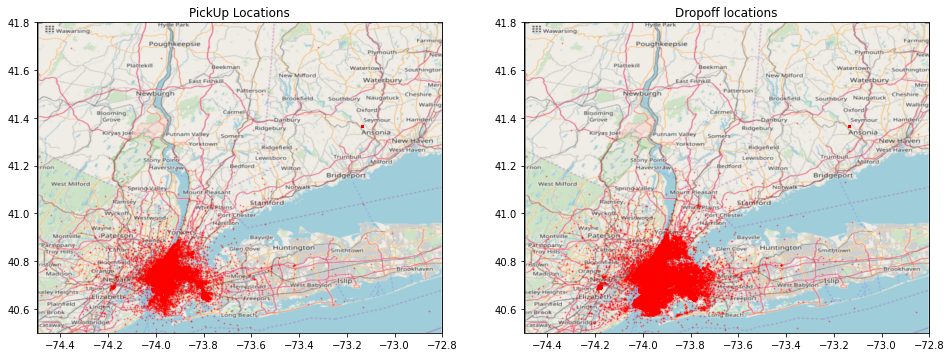

In [45]:
plot_on_map(train, BB, nyc_map, s=1, alpha=0.3)

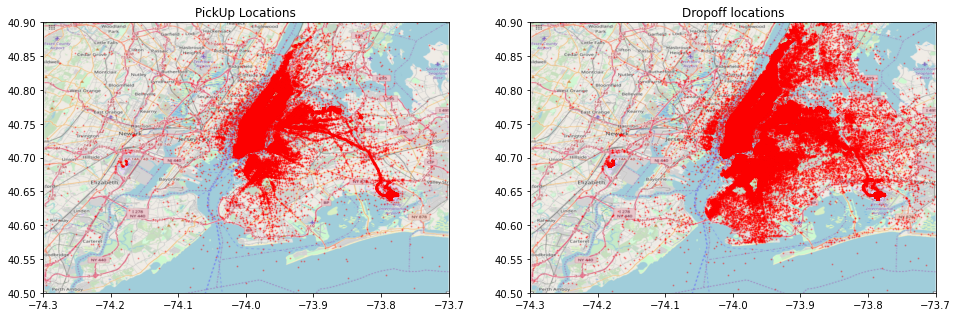

In [46]:
plot_on_map(train, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

### 7.数据类型检查

In [47]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

object :字符串类型  

则需要改变key和pickup_datetime 的数据类型

In [48]:
# 可以知道key和pickup_datetime是时间，可以改变成合适的时间类型
for dataset in [train,test]:
    dataset['key']=pd.to_datetime(dataset['key'])
    dataset['pickup_datetime']=pd.to_datetime(dataset['pickup_datetime'])

### 8.对日期数据进行分析
日期分为：  

1.year  
2.month  
3.day  
4.hour  
5.day of week

In [49]:
for dataset in [train,test]:
    dataset['year'] = dataset['pickup_datetime'].dt.year
    dataset['month'] = dataset['pickup_datetime'].dt.month
    dataset['day'] = dataset['pickup_datetime'].dt.day
    dataset['hour'] = dataset['pickup_datetime'].dt.hour
    dataset['day of week'] = dataset['pickup_datetime'].dt.dayofweek

In [50]:
train['year'].value_counts()

2012    157176
2011    154844
2013    153010
2009    152019
2010    147597
2014    145861
2015     68511
Name: year, dtype: int64

In [51]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1


In [52]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,1
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,1
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,5
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,5
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,5


### 9.根据经纬度计算距离（直线距离）
np.radians()角度转为弧度

In [53]:
def distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  # 地球半径（单位：千米）
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) # 单位：千米
        i['H_Distance'] = d
      
        
    return d

In [54]:
distance('pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [55]:
# 查看训练集和测试集的距离计算情况
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week,H_Distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1,1.999157


In [56]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week,H_Distance
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,1,2.323260
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,1,2.425353
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,5,0.618628
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,5,1.961033
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,5,5.387301


####  查看距离为0，票价为0的数据数量，并进行处理

In [57]:

Counter((train['H_Distance']==0 )& (train['fare_amount']==0))
# Counter(()&())

Counter({False: 979015, True: 3})

In [58]:
#看一下这三个数据
train[(train['H_Distance']==0 )& (train['fare_amount']==0)]
# train[()&()]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week,H_Distance
331597,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54+00:00,-73.982354,40.679971,-73.982354,40.679971,1,2013,8,5,6,0,0.0
436658,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39+00:00,-74.043442,40.788208,-74.043442,40.788208,1,2015,3,4,22,2,0.0
689250,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03+00:00,-73.994125,40.741131,-73.994125,40.741131,1,2015,5,27,23,2,0.0


In [59]:
#删除掉这些数据
train.drop((train[(train['H_Distance']==0 )& (train['fare_amount']==0)]).index,axis=0,inplace=True)

In [60]:
# 查看是否已经删除
Counter((train['H_Distance']==0 )& (train['fare_amount']==0))

Counter({False: 979015})

####  看一下查看距离为0，票价不为0的数据数量，并进行处理
原因1：司机等候时间长，赔付违约费  

原因2：经纬度位置录入错误，大致距离计算错误


In [61]:
Counter((train['H_Distance']==0)&(train['fare_amount']!=0))
# 数量还是倾大的，如果不删除会影响训练出来的模型

Counter({False: 968537, True: 10478})

In [62]:
train.drop((train[(train['H_Distance']==0 )& (train['fare_amount']!=0)]).index,axis=0,inplace=True)

In [63]:
Counter((train['H_Distance']==0)&(train['fare_amount']!=0))

Counter({False: 968537})

In [64]:
train[train['H_Distance']<=1]
# 可以把1km当做起步距离，否则算价格会很大

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week,H_Distance
12,2009-11-06 01:04:03.000000200,4.1,2009-11-06 01:04:03+00:00,-73.991601,40.744712,-73.983081,40.744682,2,2009,11,6,1,4,0.717767
18,2010-07-07 14:52:00.000000440,5.3,2010-07-07 14:52:00+00:00,-73.969505,40.784843,-73.958732,40.783357,1,2010,7,7,14,2,0.921952
19,2014-12-06 20:36:22.000000800,4.0,2014-12-06 20:36:22+00:00,-73.979815,40.751902,-73.979446,40.755481,1,2014,12,6,20,5,0.399179
22,2009-08-06 18:17:23.000000100,4.5,2009-08-06 18:17:23+00:00,-73.991707,40.770505,-73.985459,40.763671,1,2009,8,6,18,3,0.924296
27,2011-06-28 19:47:00.000000168,4.5,2011-06-28 19:47:00+00:00,-73.988893,40.760160,-73.986445,40.757857,3,2011,6,28,19,1,0.328771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999973,2011-05-07 12:53:00.000000740,11.3,2011-05-07 12:53:00+00:00,-73.952537,40.808417,-73.953065,40.803848,5,2011,5,7,12,5,0.509990
999983,2014-08-29 07:18:09.000000300,4.5,2014-08-29 07:18:09+00:00,-73.991835,40.750038,-73.984214,40.754428,1,2014,8,29,7,4,0.806466
999986,2015-06-02 09:21:33.000000100,7.0,2015-06-02 09:21:33+00:00,-73.975723,40.758533,-73.981537,40.752602,1,2015,6,2,9,1,0.821492
999987,2010-01-26 15:03:00.000000800,4.1,2010-01-26 15:03:00+00:00,-73.982407,40.765418,-73.981803,40.763305,1,2010,1,26,15,1,0.240398


In [65]:
train.loc[train['H_Distance']<=1]=1

In [66]:
test[test['H_Distance']<=1]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week,H_Distance
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,5,0.618628
6,2011-10-06 12:10:20.000000100,2011-10-06 12:10:20+00:00,-73.949013,40.773204,-73.959622,40.770893,1,2011,10,6,12,3,0.929601
12,2010-03-29 20:20:32.000000200,2010-03-29 20:20:32+00:00,-73.991198,40.739937,-73.997166,40.735269,1,2010,3,29,20,0,0.722670
16,2012-07-15 16:45:04.000000600,2012-07-15 16:45:04+00:00,-74.006746,40.731721,-74.010204,40.732318,1,2012,7,15,16,6,0.298838
18,2012-07-15 16:45:04.000000300,2012-07-15 16:45:04+00:00,-73.973548,40.763349,-73.972096,40.756417,1,2012,7,15,16,6,0.780444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,2014-07-21 18:19:00.000000650,2014-07-21 18:19:00+00:00,-73.981425,40.773935,-73.981425,40.773935,6,2014,7,21,18,0,0.000000
9861,2012-11-20 21:54:00.000000219,2012-11-20 21:54:00+00:00,-73.998170,40.756010,-73.999222,40.762927,6,2012,11,20,21,1,0.774222
9888,2013-09-25 22:00:00.000000146,2013-09-25 22:00:00+00:00,-73.956488,40.767512,-73.956488,40.767512,6,2013,9,25,22,2,0.000000
9898,2015-01-12 15:36:37.000000200,2015-01-12 15:36:37+00:00,-73.979042,40.777515,-73.983658,40.781082,6,2015,1,12,15,0,0.555287


In [67]:
test.loc[test['H_Distance']<=1]=1

### 10 构建新的字段：每公里车费：根据距离、车费，计算每公里的车费

In [68]:
train['fare_per_mile']=train['fare_amount']/train['H_Distance']
train['fare_per_mile'].describe()
# 数据还是比较正常的

count    968537.000000
mean          3.355208
std           1.747870
min           0.000000
25%           2.418860
50%           3.275327
75%           4.212032
max         140.796253
Name: fare_per_mile, dtype: float64

pivot_table 数据透视表  

https://blog.csdn.net/qq_55342245/article/details/121673329?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166641432116782391856718%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=166641432116782391856718&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-121673329-null-null.142^v59^pc_search_tree,201^v3^add_ask&utm_term=pivot_table%E5%87%BD%E6%95%B0&spm=1018.2226.3001.4187

In [69]:
pic=pd.pivot_table(train,index=['hour','year'],values=['fare_per_mile'])
# 这种默认给的是平均值，把该数据进行可视化

In [70]:
pic

fare_per_mile
hour year               
0    2009       3.200904
     2010       3.222206
     2011       3.174296
     2012       3.326289
     2013       3.701571
...                  ...
23   2011       3.228696
     2012       3.418017
     2013       3.783226
     2014       3.827427
     2015       3.856201

[169 rows x 1 columns]

Text(0, 0.5, 'Fare $USD/mile')

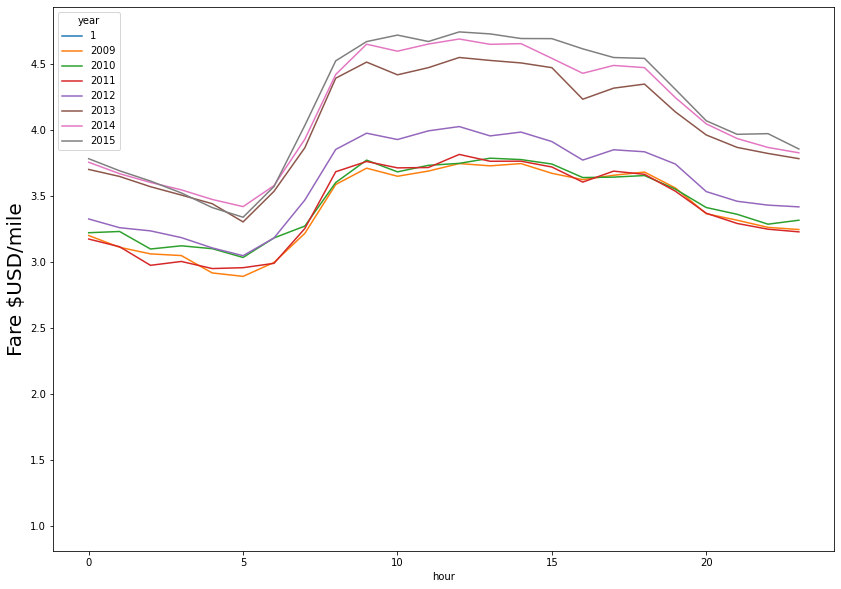

In [78]:
train.pivot_table('fare_per_mile',index='hour',columns='year').plot(figsize=(14,10))
plt.ylabel('Fare $USD/mile',size=20)

不明白为什么year里有个1

## 第三步：模型训练和数据预测

In [79]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'year', 'month', 'day', 'hour', 'day of week',
       'H_Distance', 'fare_per_mile'],
      dtype='object')

In [80]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'hour', 'day of week', 'H_Distance'],
      dtype='object')

In [81]:
x_train=train.iloc[:, [3,4,5,6,7,8,9,10,11,12,13]]

In [82]:
y_train=train.iloc[:,[1]]

In [83]:
x_train.shape

(968537, 11)

In [84]:
y_train.shape

(968537, 1)

In [86]:
# 用随机森林来实现
# 随机森林回归模型
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

C:\Users\DELL\AppData\Local\Temp/ipykernel_7088/1768712984.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

In [89]:
rf_predict=rf.predict(test.iloc[:,[2,3,4,5,6,7,8,9,10,11,12]])

In [90]:
rf_predict

array([ 9.945 , 10.68  ,  1.    , ..., 53.2081, 17.805 ,  8.29  ])

In [92]:
submission=pd.read_csv(r'D:/ML/纽约出租车车费预测/sample_submission.csv')

In [93]:
submission
#这是把测试集的key取出来，把预测结果覆盖fare_amount

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [94]:
submission['fare_amount']=rf_predict
submission.to_csv('D:/ML/纽约出租车车费预测/submission_1.csv',index=False)

In [96]:
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.9450
1,2015-01-27 13:08:24.0000003,10.6800
2,2011-10-08 11:53:44.0000002,1.0000
3,2012-12-01 21:12:12.0000002,8.9410
4,2012-12-01 21:12:12.0000003,16.8120
5,2012-12-01 21:12:12.0000005,11.8370
6,2011-10-06 12:10:20.0000001,1.0000
7,2011-10-06 12:10:20.0000003,49.0470
8,2011-10-06 12:10:20.0000002,12.9890
9,2014-02-18 15:22:20.0000002,6.0950
